## Load Data from CSVs

In [1]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
#rede file as dictionary

import csv
def readfile(filename):
    with open(filename) as f:
        read_file=csv.DictReader(f)
        return list(read_file)
        

enrollments=readfile('enrollments.csv')
daily_engagement = readfile('daily_engagement.csv')
project_submissions = readfile('project_submissions.csv')

print(daily_engagement[0])


OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])


## Fixing Data Types

In [2]:
# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
import datetime as dt 
def clean_date(date):
    if date=='':
        return None
    else:
        return dt.datetime.strptime(date,'%Y-%m-%d')
    
def clean_int(days):
    if days == '':
        return None
    else:
        return int(days)
    
#clen the data in enrollments.csv
for enrollment in enrollments:
    enrollment['join_date']=clean_date(enrollment['join_date'])
    enrollment['cancel_date']=clean_date(enrollment['cancel_date'])
    enrollment['days_to_cancel']=clean_int(enrollment['days_to_cancel'])
    enrollment['is_udacity']=(enrollment['is_udacity']=='True')
    enrollment['is_canceled']=(enrollment['is_canceled']=='True')
    
enrollments[0]


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [3]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = clean_date(engagement_record['utc_date'])
    
daily_engagement[0]


OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [4]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = clean_date(submission['completion_date'])
    submission['creation_date'] = clean_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Investigating the Data

In [5]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

#check unique student with list

#num=0
#record=[]
#for enrollment in enrollments:
#    if enrollment['account_key'] not in record:
#        record.append(enrollment['account_key'])
#        num+=1
        
#nor check unique student with set since set doesnot contain duplicate
unique_enrolled_students = set()
unique_engagement_students = set()
unique_project_submitters = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
for engagement_record in daily_engagement:
    unique_engagement_students.add(engagement_record['acct'])
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])

print('There are {} rows and {} unique students in enrollments table'.format(len(enrollments),len(unique_enrolled_students)))
print('There are {} rows and {} unique students in daily_engagement table'.format(len(daily_engagement),len(unique_engagement_students)))
print('There are {} rows and {} unique students in project_submissions table'.format(len(project_submissions),len(unique_project_submitters)))




There are 1640 rows and 1302 unique students in enrollments table
There are 136240 rows and 1237 unique students in daily_engagement table
There are 3642 rows and 743 unique students in project_submissions table


## Problems in the Data

In [6]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for item in daily_engagement:
    item['account_key']=item.pop('acct')
daily_engagement[0]



OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

## Missing Engagement Records

Need to find out why uniqure student in daily_engagement table is less than enrollments table
  * any enrolled student with no corresponding engagement data?

In [7]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_engagement_students:
        print(enrollment)
        break



OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


So this record shows the student enroled and canceled in the same day which explained the difference in number

## Checking for More Problem Records



In [8]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_missing=0

for enrollment in enrollments:
    if enrollment['account_key'] not in unique_engagement_students and enrollment['days_to_cancel']!=0:
        num_missing+=1
        print(enrollment)
print('\n')            
print('There are {} students missing'.format(num_missing))       

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


There are 3 students missing


It turns out if 'is_udacity' is True, then it is a test account and should be excluded from analysis

## Tracking Down the Remaining Problems

In [9]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [10]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_test_accounts(data):
    non_test_data = []
    for item in data:
        if item['account_key'] not in udacity_test_accounts:
            non_test_data.append(item)
    return non_test_data

In [11]:
# Remove Udacity test accounts from all three tables
non_test_enrollments = remove_test_accounts(enrollments)
non_test_engagement = remove_test_accounts(daily_engagement)
non_test_submissions = remove_test_accounts(project_submissions)

print (len(non_test_enrollments))
print (len(non_test_engagement))
print (len(non_test_submissions))

print(non_test_engagement[:1])

1622
135656
3634
[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0')])]


## Refining the Question
Question:How do numbers in the daily enagement table differ for students who pass the first project?

Issues: 
* the table contains data from after the project submission
* it is not fair to cpmpare the data from students who spend different lengths of time
* data contains the info about courses not related to the first prject

In [12]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the most recent date the student enrolled.

paid_students ={}
for enrollment in non_test_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        if enrollment['account_key'] not in paid_students or enrollment['join_date'] > paid_students[enrollment['account_key']]:
            paid_students[enrollment['account_key']]=enrollment['join_date']
            
len(paid_students)

995

## Getting Data from First Week

In [13]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [14]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for record in non_test_engagement:
    if record['account_key'] in paid_students and within_one_week(paid_students[record['account_key']], record['utc_date']):
        paid_engagement_in_first_week.append(record)
        
len(paid_engagement_in_first_week)
paid_engagement_in_first_week[:2]

[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.2848873333),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')])]

## Exploring Student Engagement

In [15]:
from collections import defaultdict

#defaultdict example:
#s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
#d = defaultdict(list)
#for k, v in s:
#     d[k].append(v)

#d['yellow']
#[1, 3]


# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
print(engagement_by_account['1'])

[OrderedDict([('utc_date', datetime.datetime(2015, 5, 6, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 9.640248), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1')]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 7, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1')]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 8, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1')]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 9, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '1')]), OrderedDict([('utc_date', datetime.datetime(2015, 5, 10, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('account_ke

In [16]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [17]:
#import statistics could calculat the dictionary value
#total_minutes = total_minutes_by_account.values()
#statistics.mean(total_minutes)
#max(total_minutes)


In [18]:
import numpy as np

# Summarize the data about minutes spent in the classroom
#need to convert dictionary value to a list, then use numpy 
total_minutes = list(total_minutes_by_account.values())
#print(total_minutes)
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

np.max(total_minutes)/60/24

Mean: 647.5901738262695
Standard deviation: 1129.2712104188108
Minimum: 0.0
Maximum: 10568.100867332541


7.3389589356475975

max mins is 10568mins which is equal to 7.3 days, which is impossible since it is the data within the first week(7days)

## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

#to locate the student who has the max minites in the first week
Maxmins=0
student_maxmins=None
for student,mins in total_minutes_by_account.items():
    if mins>Maxmins:
        Maxmins=mins
        student_maxmins=student
print (Maxmins)

#print the student info from engagement table
for item in paid_engagement_in_first_week:
    if item['account_key']==student_maxmins:
        print (item)

10568.100867332541
OrderedDict([('utc_date', datetime.datetime(2015, 1, 7, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 50.9938951667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 8, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 688.3034385), ('lessons_completed', 5), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 427.691757667), ('lessons_completed', 1), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 165.6270925), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')])
OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_c

## Lessons Completed in First Week

In [20]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

paid_engagement_in_first_week = []

for record in non_test_engagement:
    if record['account_key'] in paid_students and within_one_week(paid_students[record['account_key']], record['utc_date']):
        paid_engagement_in_first_week.append(record)


## creat the founctions:
from collections import defaultdict

def group_data(data,key_name):
    grouped_data=defaultdict(list)
    for item in data:
        grouped_data[item[key_name]].append(item)
    return grouped_data

engagement_by_account=group_data(paid_engagement_in_first_week,'account_key')
  
        
def sum_group_item(data,key_name): 
    sum_group_item={}
    for student,records in data.items():
        total=0
        for item in records:
            total+=item[key_name]
        sum_group_item[student]=total
    return sum_group_item

total_lession_by_student=sum_group_item(engagement_by_account,'lessons_completed')

def stats_summary(data): 
    print('mean',np.mean(list(data.values())))
    print('STD',np.std(list(data.values())))
    print('min',np.min(list(data.values())))
    print('max',np.max(list(data.values())))

stats_summary(total_lession_by_student)



mean 1.636180904522613
STD 3.002561299829423
min 0
max 36


## Number of Visits in First Week

In [21]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.


for item in paid_engagement_in_first_week:
    if item['num_courses_visited']>0:
        item['has_visited']=1
    else:
        item['has_visited']=0
        
engagement_by_account=group_data(paid_engagement_in_first_week,'account_key')

days_has_visited=sum_group_item(engagement_by_account,'has_visited')

stats_summary(days_has_visited)

mean 2.8673366834170855
STD 2.2551980029196814
min 0
max 7


## Splitting out Passing Students

In [22]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

#project_submissions[0]
passed_stu=set()
not_passed_stu=set()
for submission in project_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys:
        if submission['assigned_rating']=='PASSED' or submission['assigned_rating']=='DISTINCTION':
            passed_stu.add(submission['account_key'])
        else:
            not_passed_stu.add(submission['account_key'])
            
passing_engagement=[]
non_passing_engagement=[]
for item in paid_engagement_in_first_week:
    if item['account_key'] in passed_stu:
        passing_engagement.append(item)
    else:
        non_passing_engagement.append(item)

print(len(passing_engagement))
print(len(non_passing_engagement))


4527
2392


## Comparing the Two Student Groups

In [23]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

#find out the mins they spend
pass_engagement_by_account=group_data(passing_engagement,'account_key')  
no_pass_engagement_by_account=group_data(non_passing_engagement,'account_key')

mins_by_pass_student=sum_group_item(pass_engagement_by_account,'total_minutes_visited')
mins_by_no_pass_student=sum_group_item(no_pass_engagement_by_account,'total_minutes_visited')

print('passing stu:')
stats_summary(mins_by_pass_student)
print('\n')
print('none passing stu:')
stats_summary(mins_by_no_pass_student)

len(pass_engagement_by_account)

passing stu:
mean 394.58604648350865
STD 448.4995193265521
min 0.0
max 3564.7332644989997


none passing stu:
mean 143.32647426675584
STD 269.5386190114951
min 0.0
max 1768.5227493319999


647

In [24]:
#find out the days they spend
days_by_pass_student=sum_group_item(pass_engagement_by_account,'has_visited')
days_by_no_pass_student=sum_group_item(no_pass_engagement_by_account,'has_visited')

print('passing stu:')
stats_summary(days_by_pass_student)
print('\n')
print('none passing stu:')
stats_summary(days_by_no_pass_student)

passing stu:
mean 3.384853168469861
STD 2.2588214709184595
min 0
max 7


none passing stu:
mean 1.9051724137931034
STD 1.9057314413619046
min 0
max 7


In [25]:
#find out the lessons they completed

lessons_by_pass_student=sum_group_item(pass_engagement_by_account,'lessons_completed')
lessons_by_no_pass_student=sum_group_item(no_pass_engagement_by_account,'lessons_completed')

print('passing stu:')
stats_summary(lessons_by_pass_student)
print('\n')
print('none passing stu:')
stats_summary(lessons_by_no_pass_student)



passing stu:
mean 2.052550231839258
STD 3.1422270555779344
min 0
max 36


none passing stu:
mean 0.8620689655172413
STD 2.5491599418312028
min 0
max 27


it is more clear from the avg time they spend in the first week:6.5r vs 2.3r

## Making Histograms

mins_by_pass_student
mean 394.58604648350865
STD 448.4995193265521
min 0.0
max 3564.7332644989997

mins_by_no_pass_student
mean 143.32647426675584
STD 269.5386190114951
min 0.0
max 1768.5227493319999


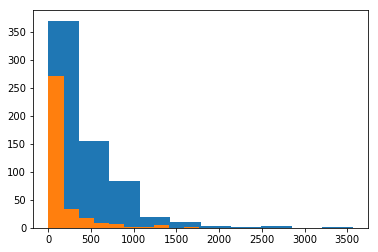

In [34]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

def plot_results(data):
    plt.hist(data.values())


print('mins_by_pass_student')
stats_summary(mins_by_pass_student)
plot_results(mins_by_pass_student)

print('\nmins_by_no_pass_student')
stats_summary(mins_by_no_pass_student)
plot_results(mins_by_no_pass_student)

days_by_pass_student
mean 3.384853168469861
STD 2.2588214709184595
min 0
max 7

days_by_no_pass_student
mean 1.9051724137931034
STD 1.9057314413619046
min 0
max 7


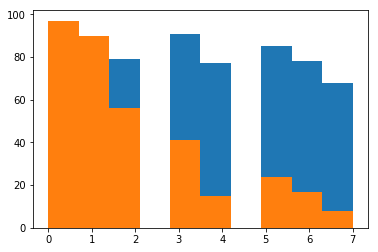

In [35]:
print('days_by_pass_student')
stats_summary(days_by_pass_student)
plot_results(days_by_pass_student)

print('\ndays_by_no_pass_student')
stats_summary(days_by_no_pass_student)
plot_results(days_by_no_pass_student)


lessons_by_pass_student
mean 2.052550231839258
STD 3.1422270555779344
min 0
max 36

lessons_by_no_pass_student
mean 0.8620689655172413
STD 2.5491599418312028
min 0
max 27


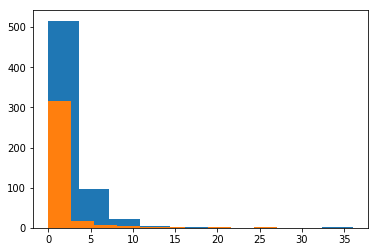

In [36]:
print('lessons_by_pass_student')
stats_summary(lessons_by_pass_student)
plot_results(lessons_by_pass_student)

print('\nlessons_by_no_pass_student')
stats_summary(lessons_by_no_pass_student)
plot_results(lessons_by_no_pass_student)

## Improving Plots and Sharing Findings

Text(0.5,0,'Minutes')

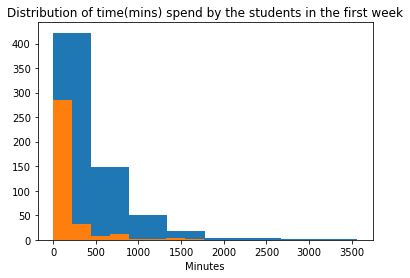

In [51]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns


plt.hist(mins_by_pass_student.values(),bins=8)
plt.hist(mins_by_no_pass_student.values(),bins=8)
plt.title('Distribution of time(mins) spend by the students in the first week')
plt.xlabel('Minutes')


Text(0.5,0,'Number of days')

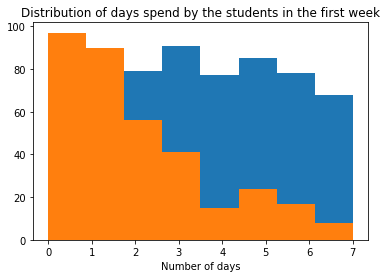

In [52]:
plt.hist(days_by_pass_student.values(),bins=8)
plt.hist(days_by_no_pass_student.values(),bins=8)
plt.title('Distribution of days spend by the students in the first week')
plt.xlabel('Number of days')

Text(0.5,0,'Number of lessons')

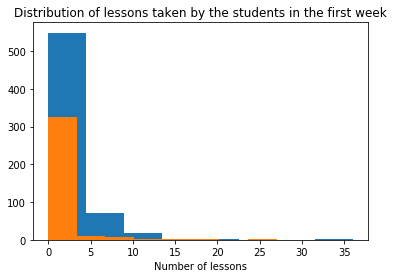

In [53]:

plt.hist(lessons_by_pass_student.values(),bins=8)
plt.hist(lessons_by_no_pass_student.values(),bins=8)
plt.title('Distribution of lessons taken by the students in the first week')
plt.xlabel('Number of lessons')



## Tentative conclusion

Student spend more times in the first week have more chance to pass the project. However, will need to validate with the statistics analysis. A/B testing need to be conducted to find out the casiation of the factors.Maching learning could be applied to predict what kind of the student is more likely to pass the project.